In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
# Update the file path as per your local setup
file_path = r"C:\Users\bhawa\Projects\interview\firstpro\events.csv"
df = pd.read_csv(file_path)


In [6]:
# Display the first few rows of the dataset
print("Dataset Preview:")
df.tail(10)

Dataset Preview:


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
885119,2021-02-28 23:51:08 UTC,view,733804,2144415958968565847,appliances.kitchen.juicer,NaN,35.00,1515915625611023253,ds44R7DkhX
885120,2021-02-28 23:51:25 UTC,view,622796,2144415922738167921,computers.components.cdrw,asus,147.38,1515915625572947504,LJ4H6CRcME
885121,2021-02-28 23:51:25 UTC,view,622796,2144415922738167921,computers.components.cdrw,asus,147.38,1515915625572947504,SqlXaC3Wrw
885122,2021-02-28 23:53:13 UTC,view,4079420,2144415922427789416,computers.components.videocards,msi,449.51,1515915625611023581,zrl0oKrysT
885123,2021-02-28 23:54:18 UTC,view,3829355,2144415922528452715,electronics.telephone,NaN,32.22,1515915625611023671,wZb7gP1zgN
885124,2021-02-28 23:55:01 UTC,view,953226,2144415927553229037,NaN,NaN,219.94,1515915625611023730,FRLqIttxKU
885125,2021-02-28 23:58:05 UTC,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.03,1515915625611024014,g6WqPf50Ma
885126,2021-02-28 23:58:09 UTC,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.92,1515915625611024020,xNIJBqZdkd
885127,2021-02-28 23:58:14 UTC,view,888273,2144415921932861531,electronics.telephone,NaN,10.16,1515915625611024030,9pCbKMIcSx
885128,2021-02-28 23:59:09 UTC,view,743182,2144415935631458761,construction.tools.soldering,kada,65.08,1515915625556087775,BejOXRngEW


In [7]:
# Check dataset information
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


In [9]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
event_time            0
event_type            0
product_id            0
category_id           0
category_code    236219
brand            212364
price                 0
user_id               0
user_session        165
dtype: int64


In [9]:
# Handle missing values
# For 'category_code' and 'brand', we can fill missing values with 'Unknown' or mode, depending on business logic
df['category_code'] = df['category_code'].fillna('Unknown')
df['brand'] = df['brand'].fillna('Unknown')
df['user_session'] = df['user_session'].fillna('Unknown_Session')

In [10]:
# Handle duplicates
print("\nNumber of duplicate rows before removal:", df.duplicated().sum())
df = df.drop_duplicates()
print("Number of duplicate rows after removal:", df.duplicated().sum())



Number of duplicate rows before removal: 655
Number of duplicate rows after removal: 0


In [11]:
# Convert event_time to datetime
print(df['event_time'])
df['event_time'] = pd.to_datetime(df['event_time'])
print(df['event_time'])

0         2020-09-24 11:57:06 UTC
1         2020-09-24 11:57:26 UTC
2         2020-09-24 11:57:27 UTC
3         2020-09-24 11:57:33 UTC
4         2020-09-24 11:57:36 UTC
                   ...           
885124    2021-02-28 23:55:01 UTC
885125    2021-02-28 23:58:05 UTC
885126    2021-02-28 23:58:09 UTC
885127    2021-02-28 23:58:14 UTC
885128    2021-02-28 23:59:09 UTC
Name: event_time, Length: 884474, dtype: object
0        2020-09-24 11:57:06+00:00
1        2020-09-24 11:57:26+00:00
2        2020-09-24 11:57:27+00:00
3        2020-09-24 11:57:33+00:00
4        2020-09-24 11:57:36+00:00
                    ...           
885124   2021-02-28 23:55:01+00:00
885125   2021-02-28 23:58:05+00:00
885126   2021-02-28 23:58:09+00:00
885127   2021-02-28 23:58:14+00:00
885128   2021-02-28 23:59:09+00:00
Name: event_time, Length: 884474, dtype: datetime64[ns, UTC]


In [12]:
# Extract additional features from event_time
df['event_date'] = df['event_time'].dt.date
df['event_hour'] = df['event_time'].dt.hour
df['event_day_of_week'] = df['event_time'].dt.dayofweek


In [13]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
                                 event_time event_type    product_id  \
count                                884474     884474  8.844740e+05   
unique                                  NaN          3           NaN   
top                                     NaN       view           NaN   
freq                                    NaN     793099           NaN   
mean    2020-12-14 11:06:15.243217408+00:00        NaN  1.906840e+06   
min               2020-09-24 11:57:06+00:00        NaN  1.020000e+02   
25%     2020-11-05 20:50:18.249999872+00:00        NaN  6.988030e+05   
50%               2020-12-14 15:34:45+00:00        NaN  1.452884e+06   
75%        2021-01-23 07:20:05.500000+00:00        NaN  3.721194e+06   
max               2021-02-28 23:59:09+00:00        NaN  4.183880e+06   
std                                     NaN        NaN  1.458710e+06   

         category_id category_code    brand          price       user_id  \
count   8.844740e+05        884474   8


Event Type Distribution:
event_type
view        793099
cart         54032
purchase     37343
Name: count, dtype: int64


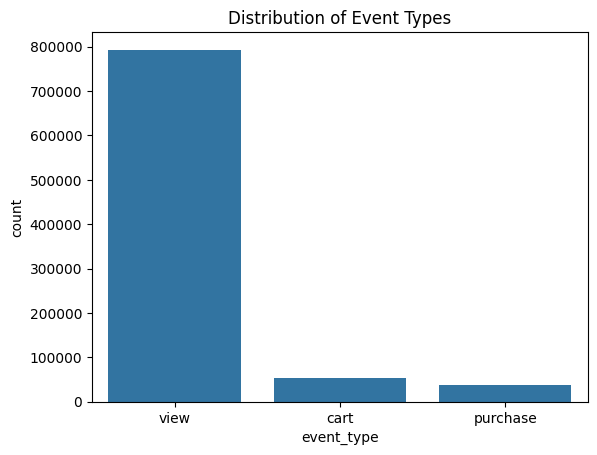

In [14]:
# Explore event_type distribution
print("\nEvent Type Distribution:")
print(df['event_type'].value_counts())
sns.countplot(data=df, x='event_type')
plt.title("Distribution of Event Types")
plt.show()


Top 10 Brands by Frequency:
brand
Unknown        212232
asus            27660
gigabyte        27652
msi             24864
palit           24787
samsung         23188
amd             20095
canon           18430
panasonic       11977
pioneer         11463
sirius          11406
hp              11182
sapphire        10376
asrock           9637
bosch            8198
palmexx          7919
topon            7542
bbk              7452
epson            7246
xiaomi           7128
sony             6773
lg               6721
kitfort          6384
pitatel          6109
digma            6009
acv              5938
cactus           5663
cameronsino      5611
philips          5354
intel            5199
janome           5159
edifier          4859
logitech         4830
smartbuy         4793
redmond          4724
bort             4652
powercolor       4239
ritmix           4234
zalman           4218
mobilepc         3878
deepcool         3849
starwind         3679
nv-print         3642
hama             35

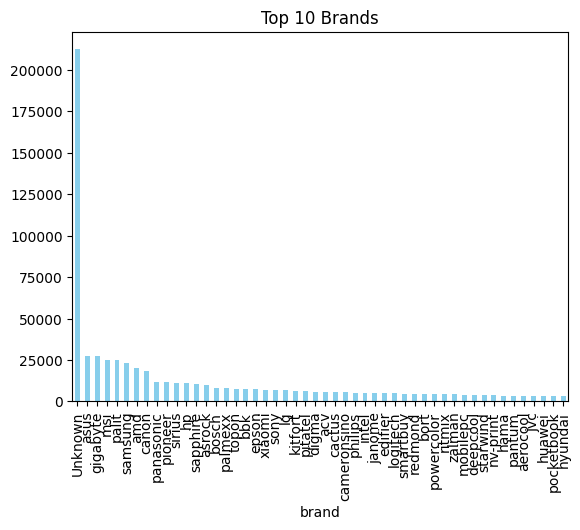

In [21]:
# Explore brand distribution
top_brands = df['brand'].value_counts().head(50)
print("\nTop 10 Brands by Frequency:")
print(top_brands)
top_brands.plot(kind='bar', title="Top 10 Brands", color='skyblue')
plt.show()

0          31.90
1          17.16
2           9.81
3         113.81
4          15.87
           ...  
885124    219.94
885125     80.03
885126     64.92
885127     10.16
885128     65.08
Name: price, Length: 884474, dtype: float64

Price Distribution:


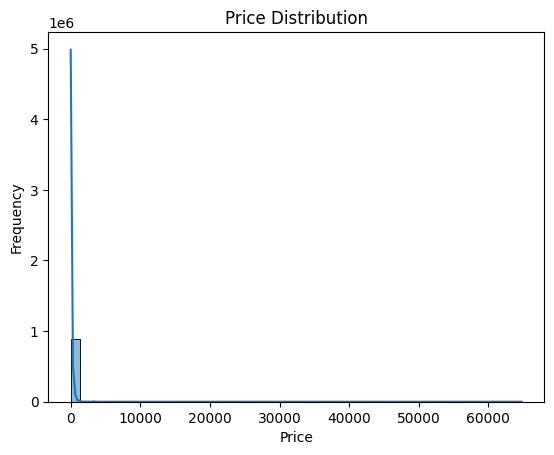

In [25]:
# Explore price distribution
print(df['price'])
print("\nPrice Distribution:")
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [26]:
# Check user activity levels
user_activity = df.groupby('user_id')['event_type'].count().sort_values(ascending=False)
print("\nUser Activity Summary (Top 10 Users by Activity):")
print(user_activity.head(10))



User Activity Summary (Top 10 Users by Activity):
user_id
1515915625554995474    572
1515915625527763086    424
1515915625591251010    363
1515915625591659523    339
1515915625537803839    329
1515915625568273951    312
1515915625599852988    288
1515915625598794428    260
1515915625536567608    259
1515915625593948004    246
Name: event_type, dtype: int64


In [28]:
# Save cleaned data for further steps
df.to_csv("cleaned_events.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_events.csv'")



Cleaned dataset saved as 'cleaned_events.csv'
